In [ ]:
import numpy as np

iris = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1) 
X = iris[:, :4]
y = iris[:, 4]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
X = X.T

D = 4 # dimensionality
K = 3 # number of classes

# initialize parameters randomly
theta = np.random.randn(D+1, K)

# gradient descent loop
num_examples = X.shape[1]
learning_rate = 0.001
losses = []
num_iter = 1000
for epoch in range(num_iter):
    # evaluate class scores
    scores = np.dot(theta.T, X)
    
    #compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=0)
    
    # compute the loss
    corect_logprobs = -np.log(probs[y, range(num_examples)])
    loss = np.sum(corect_logprobs) / num_examples
    losses.append(loss)
    
    # compute the gradient on scores
    dscores = probs
    dscores[y, range(num_examples)] -= 1

    # backpropate the gradient to the parameters (W,b)
    dtheta = np.dot(X, dscores.T)

    # perform a parameter update
    theta += -learning_rate *dtheta

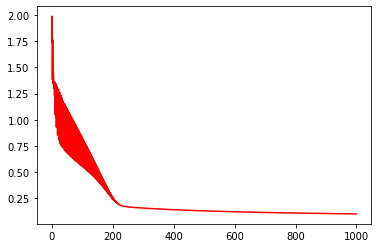

In [ ]:
import matplotlib.pyplot as plt

x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [ ]:
# evaluate training set accuracy
scores = np.dot(theta.T, X)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.99
